## 一旦7ch分の波形を見てみる

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# 0aa8d07_0.npyを読み込む
data = np.load("../data/0aa8d07_0.npy")
print(data.shape)
print(data)

(3000, 7)
[[-1.01439560e+02 -1.29318681e+01 -2.51079365e+01 ...  4.14400000e+00
   3.70098182e+07  9.66000000e+08]
 [-9.74835165e+01 -1.24849817e+01 -2.29015873e+01 ...  4.14079233e+00
   3.70095552e+07  9.65447052e+08]
 [-9.22967033e+01 -1.15912088e+01 -2.59904762e+01 ...  4.13766079e+00
   3.70092854e+07  9.64914880e+08]
 ...
 [-1.22087912e+01  3.06666667e+00  2.65206349e+01 ...  4.15405988e+00
   3.70105653e+07  9.67780897e+08]
 [-6.27582418e+01  1.54725275e+00  5.03492063e+01 ...  4.15063584e+00
   3.70103233e+07  9.67167199e+08]
 [-6.73296703e+01 -6.49670330e+00  4.46126984e+01 ...  4.14728185e+00
   3.70100743e+07  9.66573472e+08]]


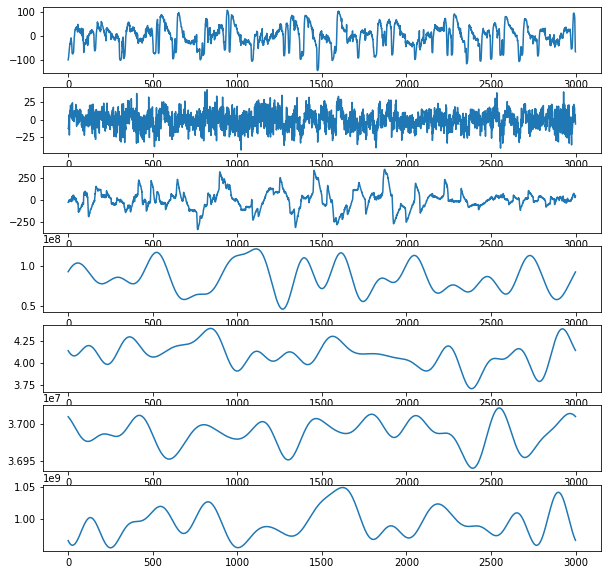

In [5]:
# 7ch分のデータをmatplotlibで表示する
fig, ax = plt.subplots(7, 1, figsize=(10, 10))
for i in range(7):
    ax[i].plot(data[:, i])
plt.show()

In [8]:
df = pd.read_csv("../data/processed/train_df0.csv")
# targetカラムに含まれる値の種類を確認する
targets = df["target"].unique()
print(targets)

['Sleep stage W' 'Sleep stage 1' 'Sleep stage 2' 'Sleep stage 3/4'
 'Sleep stage R']


In [9]:
# それぞれの値が含まれる行をランダムに3つずつ抽出しリストに保存する
target_list = []
for target in targets:
    target_list.append(df[df["target"] == target].sample(3, random_state=0))
# リストを結合してDataFrameに変換する
df_sample = pd.concat(target_list)
print(df_sample)

        epoch            meas_time           target       id
108412    275  1989-10-04 23:01:30    Sleep stage W  5125f3f
76210     912  1991-10-22 04:03:00    Sleep stage W  9279ce2
99593    1483  1989-06-06 09:45:30    Sleep stage W  cf7665d
161090    960  1990-03-14 04:00:00    Sleep stage 1  5edb9d9
76745    1447  1991-10-22 08:30:30    Sleep stage 1  9279ce2
2693     1405  1989-11-15 07:27:30    Sleep stage 1  8fbd71b
154919    943  1989-04-19 04:47:30    Sleep stage 2  0691b9d
135834    851  1989-07-11 04:55:30    Sleep stage 2  9cba116
62342     512  1989-07-12 00:15:00    Sleep stage 2  c879128
10873     314  1989-04-25 22:27:00  Sleep stage 3/4  90d10f7
26701     944  1989-05-03 04:12:00  Sleep stage 3/4  e85961d
94043     541  1989-06-23 00:23:30  Sleep stage 3/4  60e9352
143563    434  1990-04-03 00:57:00    Sleep stage R  6bd6b4c
88295     835  1990-03-30 02:32:30    Sleep stage R  ead1549
62770     940  1989-07-12 03:49:00    Sleep stage R  c879128


target: Sleep stage W
5125f3f_275


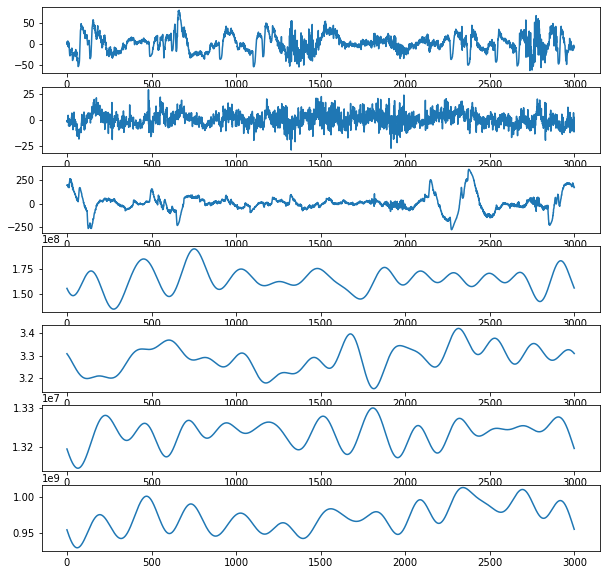

9279ce2_912


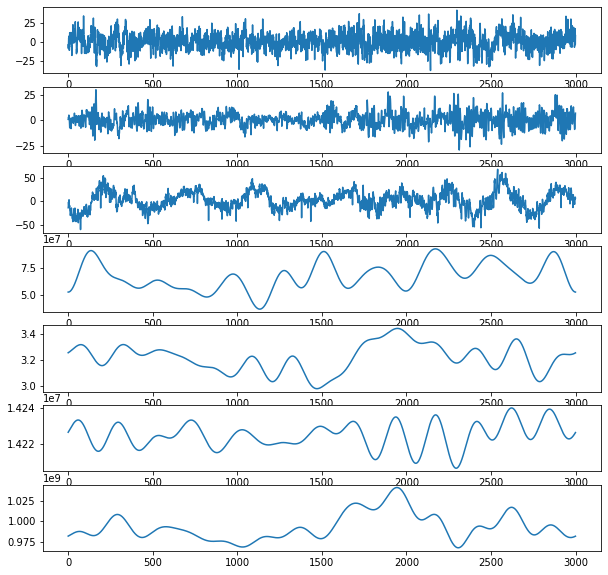

cf7665d_1483


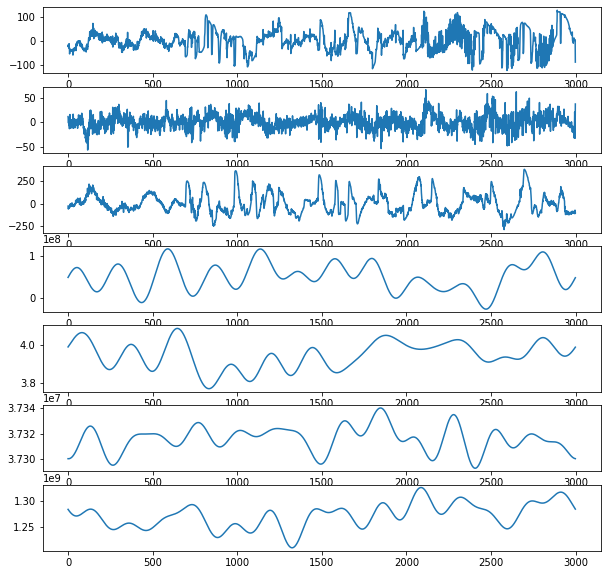

target: Sleep stage 1
5edb9d9_960


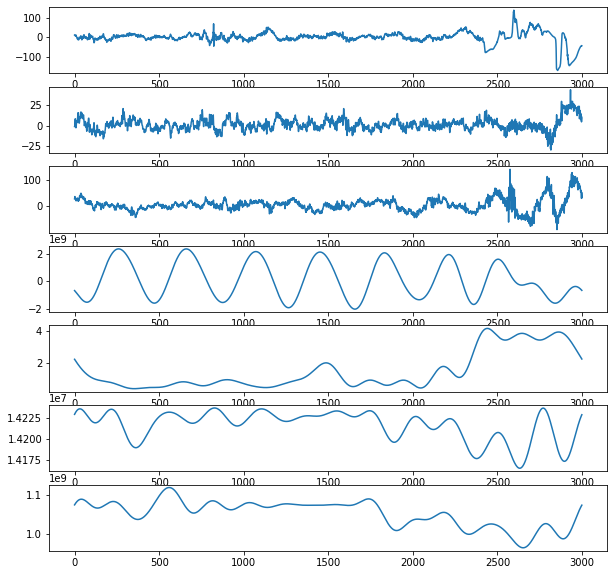

9279ce2_1447


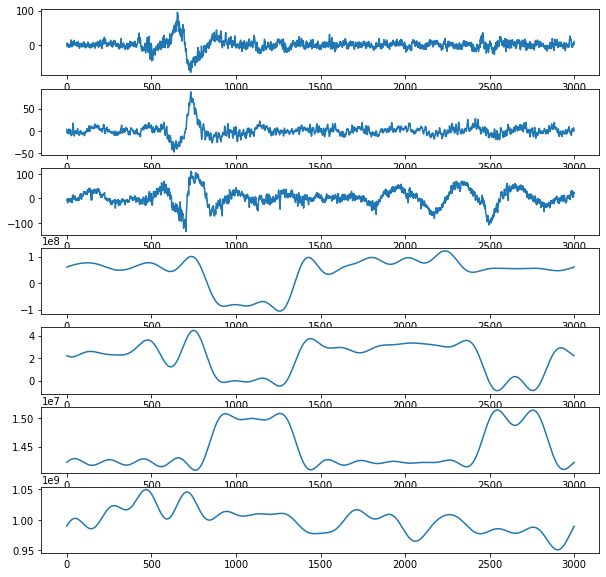

8fbd71b_1405


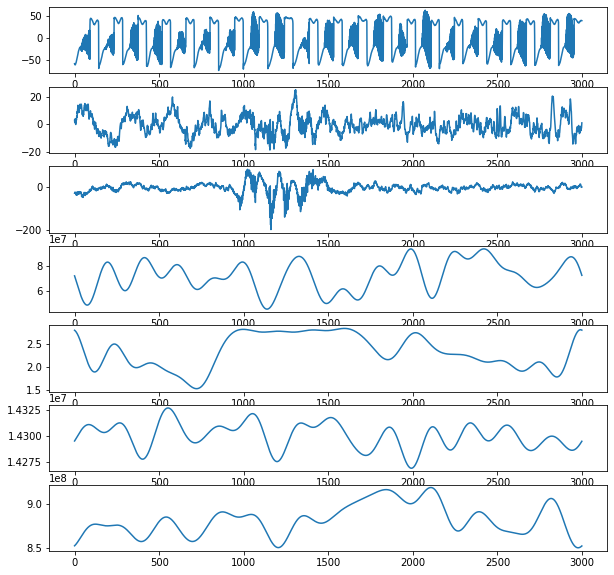

target: Sleep stage 2
0691b9d_943


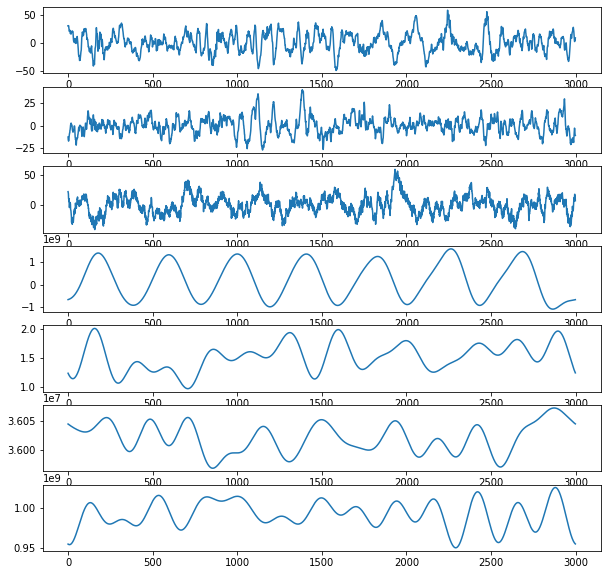

9cba116_851


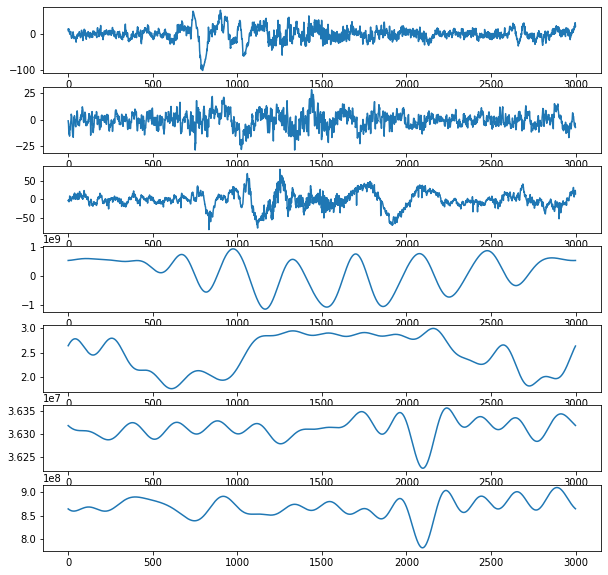

c879128_512


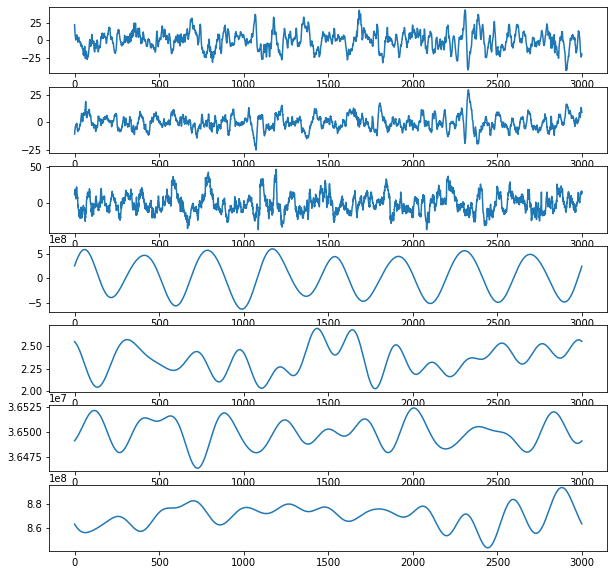

target: Sleep stage 3/4
90d10f7_314


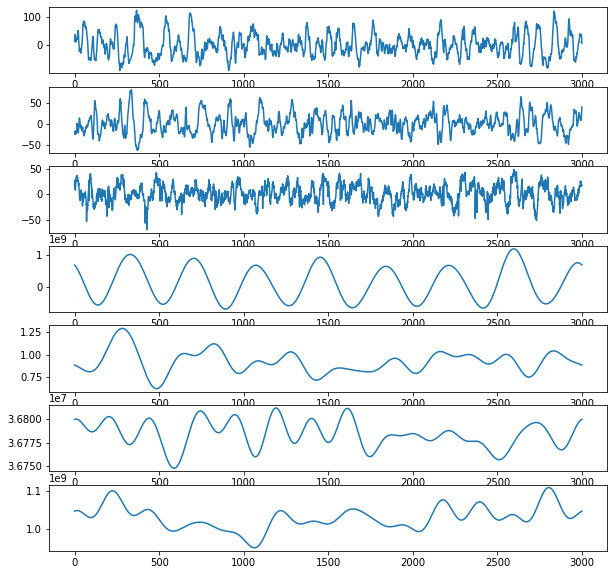

e85961d_944


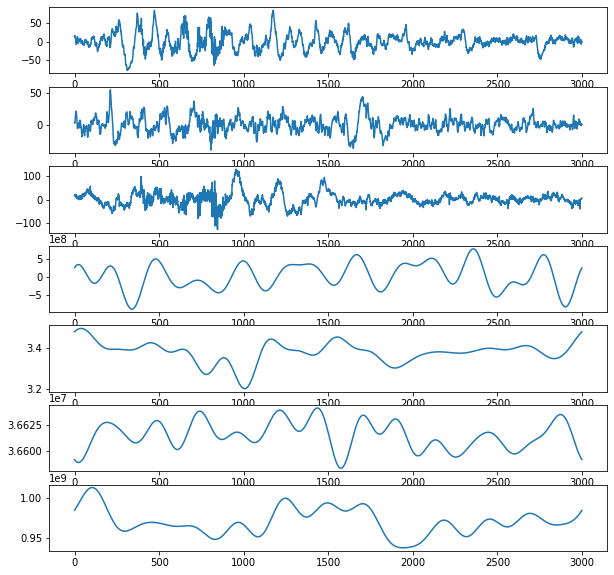

60e9352_541


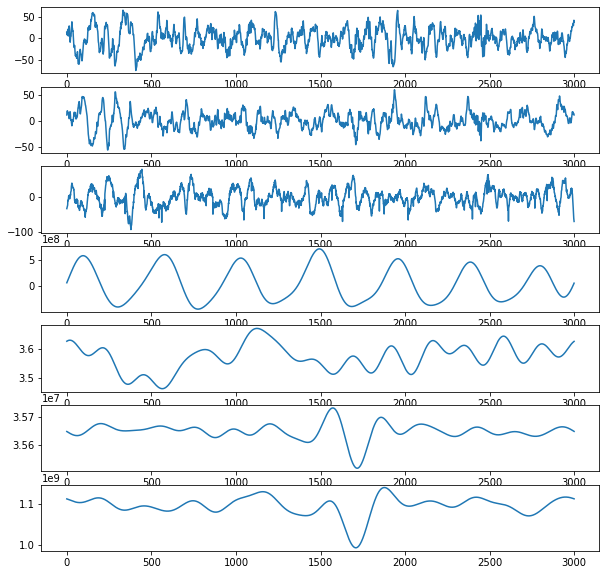

target: Sleep stage R
6bd6b4c_434


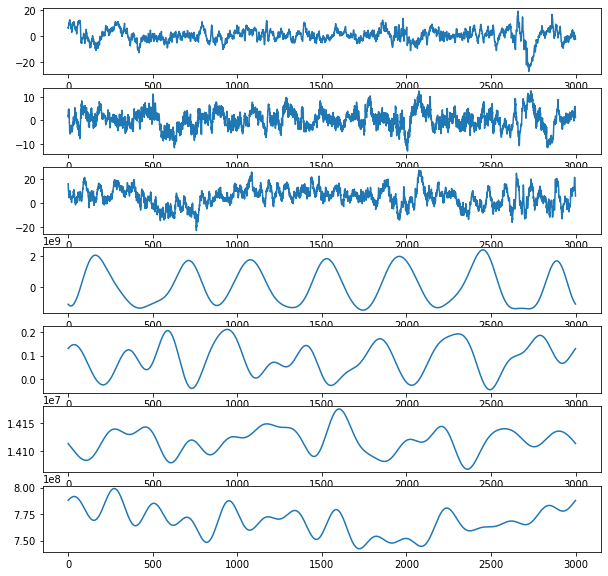

ead1549_835


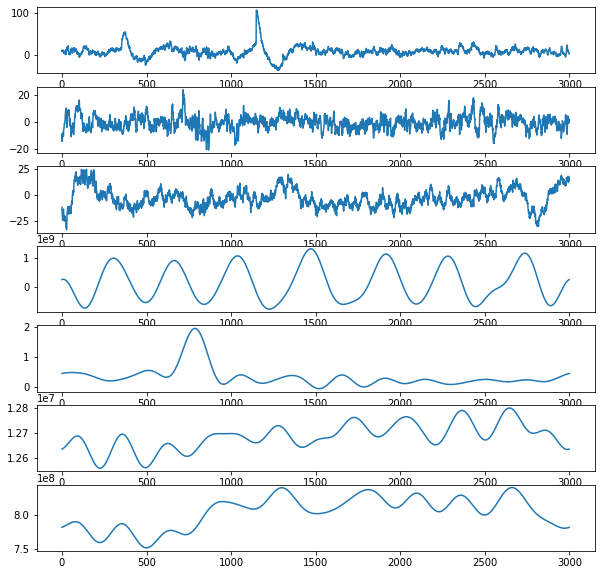

c879128_940


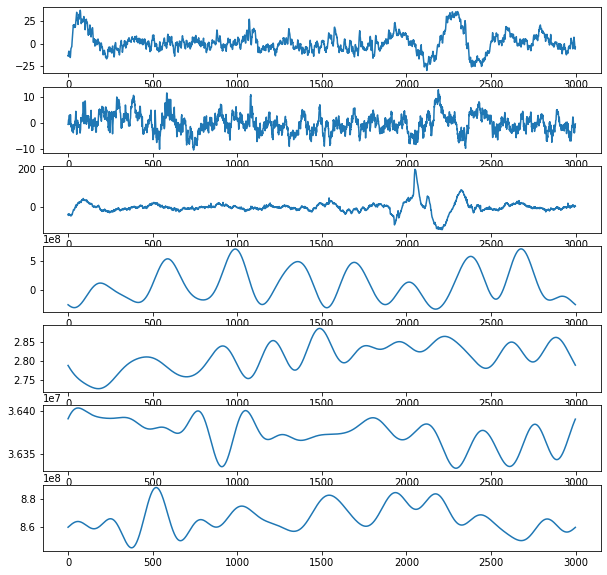

In [20]:
for t in targets:
    print(f"target: {t}")
    df_target = df_sample[df_sample["target"] == t]

    for i in range(len(df_target)):
        id = df_target.iloc[i]["id"]
        epoch = df_target.iloc[i]["epoch"]
        fname = f"{id}_{epoch}"
        data = np.load(f"../data/arrays/{fname}.npy")
        print(fname)
        fig, ax = plt.subplots(7, 1, figsize=(10, 10))
        for j in range(7):
            ax[j].plot(data[:, j])
        plt.show()

## 各チャンネルの比較

上記の波形は、以下の `COLS` の並びで表示されているはず

In [21]:
COLS = [
    "EEG Fpz-Cz",
    "EEG Pz-Oz",
    "EOG horizontal",
    "Resp oro-nasal",
    "EMG submental",
    "Temp rectal",
    "Event marker"
]

channel: EEG Fpz-Cz


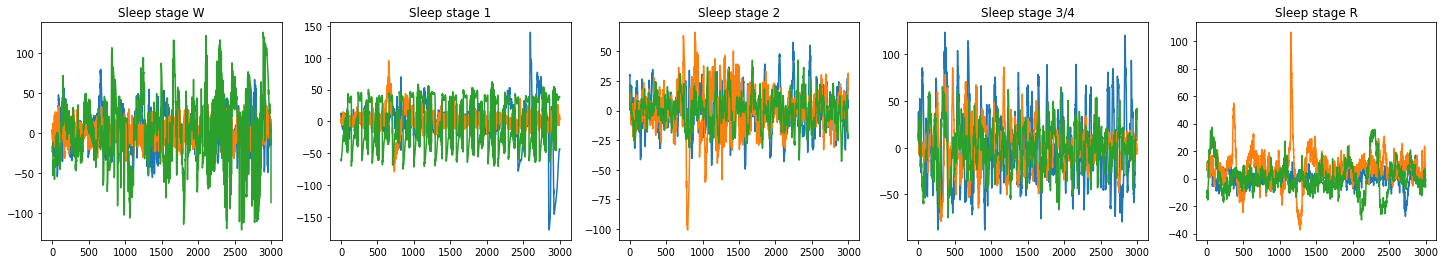

channel: EEG Pz-Oz


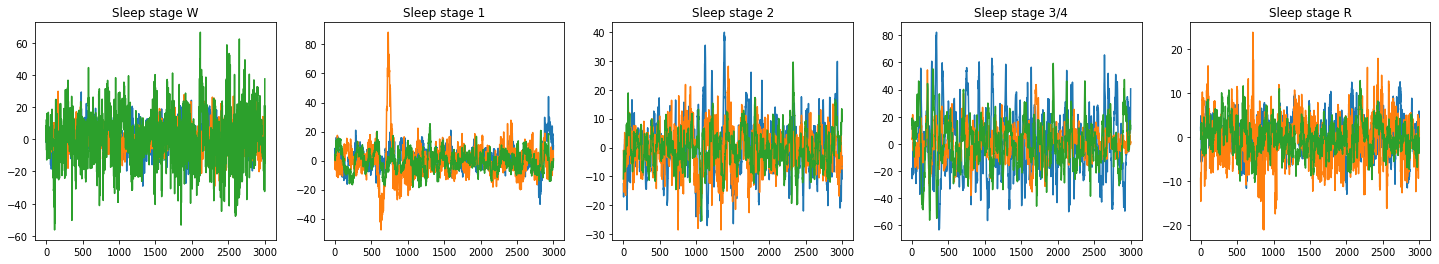

channel: EOG horizontal


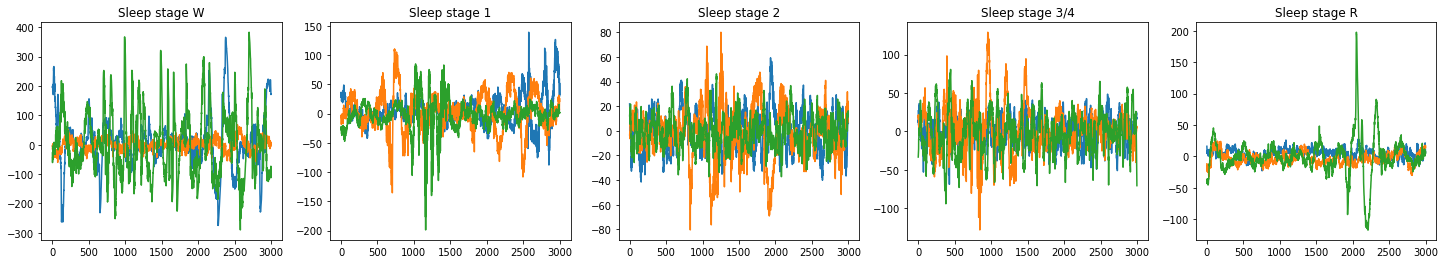

channel: Resp oro-nasal


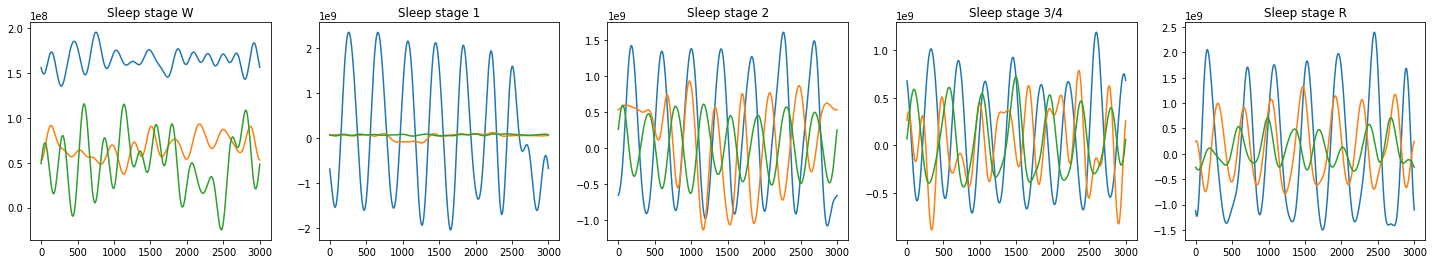

channel: EMG submental


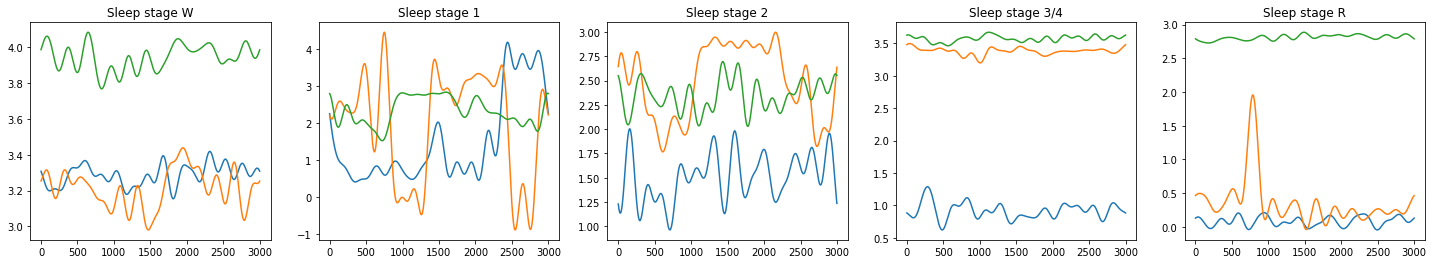

channel: Temp rectal


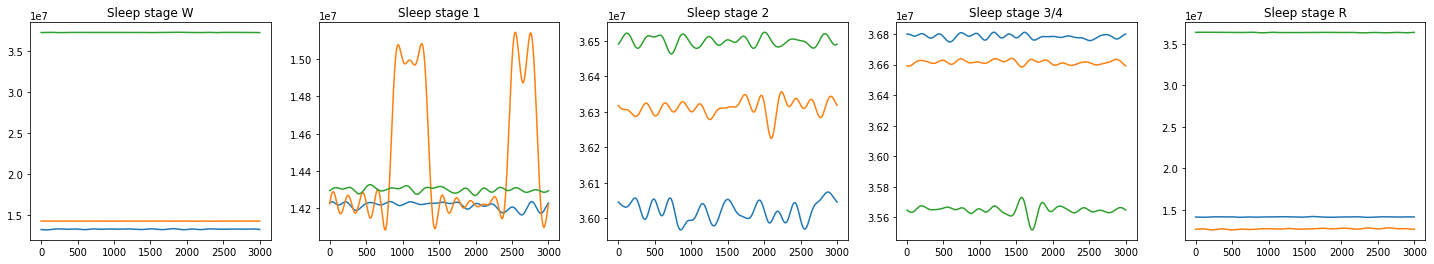

channel: Event marker


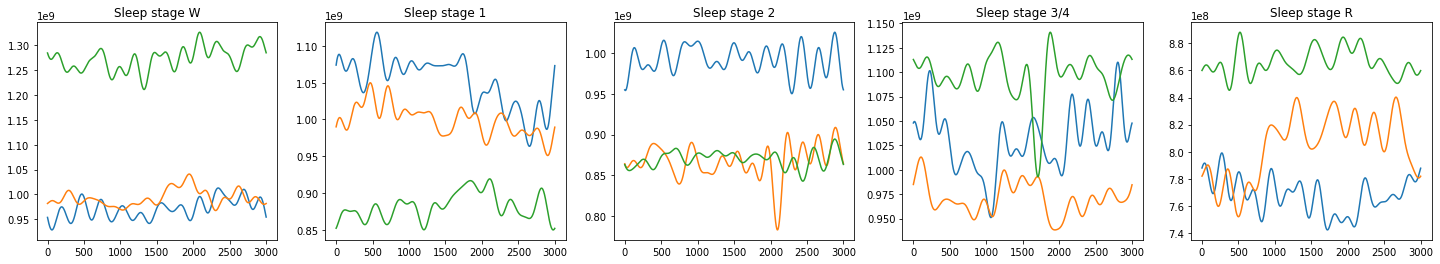

In [35]:
# channelが共通するグラフを横に並べて表示する
for i, ch in enumerate(COLS):
    print(f"channel: {ch}")
    fig, axs = plt.subplots(1, len(targets), figsize=(25, 4))
    for t_i, t in enumerate(targets):
        df_target = df_sample[df_sample["target"] == t]
        for j in range(len(df_target)):
            id = df_target.iloc[j]["id"]
            epoch = df_target.iloc[j]["epoch"]
            fname = f"{id}_{epoch}"
            data = np.load(f"../data/arrays/{fname}.npy")
            axs[t_i].plot(data[:, i])
        axs[t_i].set_title(t)
    plt.show()